In [3]:
import os
import sys
import pandas as pd

sys.path.append('../')

In [4]:
from config import *

# Summary

* 60 frames/per second
* 120 video in train
* 6 videos in mock test
* about 400 frames per video 

In [5]:
%cd ..

/home/anastasiya/Kaggle/NFL/nfl_impact_detection/nascar


### more

In [6]:
# each play has two videos - sideline and endzone
# videos are aligned
# train - train video set
# train_labels - labels for train videos
# test - test video set
# images - additional dataset with helmet bounding boxes
# image_labels - labels for images
# test set - 15 test videos
# test videos copied from train set
# mp4 - video format
# only make prediction for the view that a player is actually visible in
# video 59.94 frames per second
# videos aligned +- 3 sec
# The Sideline and Endzone views have been time-synced such that the snap occurs 10 frames into the video. ???

In [7]:
# for evaluation
# impact= 1
# confidence > 1
# visibility > 0

# Kaggle EDA

https://www.kaggle.com/divyanshuusingh/nfl-exploratory-data-analysis - very nice! nice correlations!

# File descriptions

### sample_submission

In [8]:
"""
sample_submission.csv A valid sample submission file.

gameKey: the ID code for the game.

playID: the ID code for the play.

view: the camera orientation.

video: the filename of the associated video.

frame: the frame number for this play.

[left/width/top/height]: the specification of the bounding box of the prediction.
"""

'\nsample_submission.csv A valid sample submission file.\n\ngameKey: the ID code for the game.\n\nplayID: the ID code for the play.\n\nview: the camera orientation.\n\nvideo: the filename of the associated video.\n\nframe: the frame number for this play.\n\n[left/width/top/height]: the specification of the bounding box of the prediction.\n'

### train_labels

In [9]:
"""
train_labels.csv Helmet tracking and collision labels for the training set.

gameKey: the ID code for the game.

playID: the ID code for the play.

view: the camera orientation.

video: the filename of the associated video.

frame: the frame number for this play.

label: the associate player's number.

[left/width/top/height]: the specification of the bounding box of the prediction.

impact: an indicator (1 = helmet impact) for bounding boxes associated with helmet impacts

impactType: a description of the type of helmet impact: helmet, shoulder, body, ground, etc.

confidence: 1 = Possible, 2 = Definitive, 3 = Definitive and Obvious

visibility: 0 = Not Visible from View, 1 = Minimum, 2 = Visible, 3 = Clearly Visible
"""

"\ntrain_labels.csv Helmet tracking and collision labels for the training set.\n\ngameKey: the ID code for the game.\n\nplayID: the ID code for the play.\n\nview: the camera orientation.\n\nvideo: the filename of the associated video.\n\nframe: the frame number for this play.\n\nlabel: the associate player's number.\n\n[left/width/top/height]: the specification of the bounding box of the prediction.\n\nimpact: an indicator (1 = helmet impact) for bounding boxes associated with helmet impacts\n\nimpactType: a description of the type of helmet impact: helmet, shoulder, body, ground, etc.\n\nconfidence: 1 = Possible, 2 = Definitive, 3 = Definitive and Obvious\n\nvisibility: 0 = Not Visible from View, 1 = Minimum, 2 = Visible, 3 = Clearly Visible\n"

### image_labels

In [10]:
"""
image_labels.csv contains the bounding boxes corresponding to the images.

image: the image file name.

label: the label type.

[left/width/top/height]: the specification of the bounding box of the label, with left=0 and top=0 being the top left corner.
"""

'\nimage_labels.csv contains the bounding boxes corresponding to the images.\n\nimage: the image file name.\n\nlabel: the label type.\n\n[left/width/top/height]: the specification of the bounding box of the label, with left=0 and top=0 being the top left corner.\n'

### train/test tracking

In [11]:
"""train/test]_player_tracking.csv Each player wears a sensor that allows us to precisely locate them on the field; that information is reported in these two files.

gameKey: the ID code for the game.

playID: the ID code for the play.

player: the player's ID code.

time: timestamp at 10 Hz.

x: player position along the long axis of the field. See figure below.

y: player position along the short axis of the field. See figure below.

s: speed in yards/second.

a: acceleration in yards/second^2.

dis: distance traveled from prior time point, in yards.

o: orientation of player (deg).

dir: angle of player motion (deg).

event: game events like a snap, whistle, etc.
"""

"train/test]_player_tracking.csv Each player wears a sensor that allows us to precisely locate them on the field; that information is reported in these two files.\n\ngameKey: the ID code for the game.\n\nplayID: the ID code for the play.\n\nplayer: the player's ID code.\n\ntime: timestamp at 10 Hz.\n\nx: player position along the long axis of the field. See figure below.\n\ny: player position along the short axis of the field. See figure below.\n\ns: speed in yards/second.\n\na: acceleration in yards/second^2.\n\ndis: distance traveled from prior time point, in yards.\n\no: orientation of player (deg).\n\ndir: angle of player motion (deg).\n\nevent: game events like a snap, whistle, etc.\n"

# Data analysis

In [12]:
len(os.listdir(images_fp))

9947

In [13]:
len(os.listdir(train_fp))

120

In [14]:
len(os.listdir(test_fp))

6

In [15]:
# images
# train videos
# test videos
# nflimpact - something strange

In [16]:
fps= [sample_sub_fp, train_labels_fp, image_labels_fp, train_tracking_fp, test_tracking_fp]

In [17]:
sub, train_labels, image_labels, train_tracking, test_tracking = [pd.read_csv(fp) for fp in fps]

### sample submission

In [18]:
sub.head()

,gameKey,playID,view,video,frame,left,width,top,height
0,57906,718,Endzone,57906_000718_Endzone.mp4,1,802,19,179,29
1,57906,718,Endzone,57906_000718_Endzone.mp4,1,622,19,274,29
2,57906,718,Endzone,57906_000718_Endzone.mp4,1,671,18,286,14
3,57906,718,Endzone,57906_000718_Endzone.mp4,1,437,19,269,26
4,57906,718,Endzone,57906_000718_Endzone.mp4,1,321,24,252,27


### train labels

In [19]:
train_labels.head()

,gameKey,playID,view,video,frame,label,left,width,top,height,impact,impactType,confidence,visibility
0,57583,82,Endzone,57583_000082_Endzone.mp4,1,H30,629,19,40,24,NaN,NaN,NaN,NaN
1,57583,82,Endzone,57583_000082_Endzone.mp4,1,V72,443,22,344,16,NaN,NaN,NaN,NaN
2,57583,82,Endzone,57583_000082_Endzone.mp4,1,V86,871,21,359,17,NaN,NaN,NaN,NaN
3,57583,82,Endzone,57583_000082_Endzone.mp4,1,V74,771,19,345,15,NaN,NaN,NaN,NaN
4,57583,82,Endzone,57583_000082_Endzone.mp4,1,V34,549,26,461,20,NaN,NaN,NaN,NaN


In [20]:
train_labels['impactType'].value_counts()

Helmet      1553
Shoulder     346
Body         332
Ground        56
shoulder       2
Hand           2
Name: impactType, dtype: int64

In [21]:
len(train_labels)

983885

In [22]:
len(train_labels['video'].unique())

120

In [23]:
len(train_labels.drop_duplicates(['video', 'frame']))

52142

In [24]:
train_labels.drop_duplicates(['video', 'frame']).groupby('video').size()

video
57583_000082_Endzone.mp4     472
57583_000082_Sideline.mp4    471
57584_000336_Endzone.mp4     615
57584_000336_Sideline.mp4    617
57584_002674_Endzone.mp4     421
                            ... 
58104_000352_Sideline.mp4    350
58106_002918_Endzone.mp4     549
58106_002918_Sideline.mp4    548
58107_004362_Endzone.mp4     473
58107_004362_Sideline.mp4    473
Length: 120, dtype: int64

In [25]:
video_names = train_labels['video'].unique().tolist()

In [26]:
video_idxs_1 = set(['_'.join(name.split('_')[:2]) for name in video_names])

In [27]:
len(video_idxs_1)

60

In [28]:
train_labels['impactType'].value_counts(normalize=True)

Helmet      0.677870
Shoulder    0.151026
Body        0.144915
Ground      0.024443
shoulder    0.000873
Hand        0.000873
Name: impactType, dtype: float64

In [29]:
train_labels[(train_labels['frame'] >=30) & (train_labels['frame'] <= 100)]['impactType'].value_counts(normalize=True)

Helmet      0.790679
Shoulder    0.161079
Body        0.046607
Ground      0.001635
Name: impactType, dtype: float64

In [30]:
impact = train_labels.query("impact == 1 and confidence > 1 and visibility > 0")

In [31]:
len(impact[(impact['frame'] >0) & (impact['frame'] <= 30)])/len(impact)

0.0031779661016949155

In [32]:
len(impact[(impact['frame'] >30) & (impact['frame'] <= 90)])/len(impact)

0.5323093220338984

In [33]:
len(impact[(impact['frame'] >=91) & (impact['frame'] <= 10000)])/len(impact)

0.4645127118644068

### image labels

In [34]:
image_labels[50:100]

,image,label,left,width,top,height
50,57503_000116_Sideline_frame490.jpg,Helmet-Sideline,265,13,668,14
51,57503_000116_Sideline_frame490.jpg,Helmet-Sideline,239,14,692,15
52,57503_000116_Sideline_frame490.jpg,Helmet-Sideline,172,13,686,14
53,57503_000116_Sideline_frame490.jpg,Helmet-Blurred,1198,12,322,12
54,57503_001581_Endzone_frame327.jpg,Helmet,1085,27,142,32
55,57503_001581_Endzone_frame327.jpg,Helmet,869,27,381,28
56,57503_001581_Endzone_frame327.jpg,Helmet,722,27,335,27
57,57503_001581_Endzone_frame327.jpg,Helmet,710,24,323,28
58,57503_001581_Endzone_frame327.jpg,Helmet,672,26,308,29
59,57503_001581_Endzone_frame327.jpg,Helmet,688,28,265,27


In [35]:
image_labels['label'].value_counts()

Helmet              129764
Helmet-Blurred       33544
Helmet-Sideline      15037
Helmet-Partial        8814
Helmet-Difficult      6577
Name: label, dtype: int64

In [36]:
len(image_labels['image'].unique())

9947

In [37]:
len(image_labels)

193736

In [38]:
image_names = image_labels['image'].values.tolist()

In [39]:
video_idxs_2 = set(['_'.join(name.split('_')[:2]) for name in image_names])

In [40]:
len(video_idxs_2)

7361

In [41]:
len(video_idxs_2 - video_idxs_1)

7360

### train tracking

In [42]:
len(train_tracking)

333811

In [43]:
train_tracking.head(20)

,gameKey,playID,player,time,x,y,s,a,dis,o,dir,event
0,57583,82,H97,2018-09-14T00:23:45.500Z,38.89,28.06,0.0,0.0,0.00,261.28,222.79,NaN
1,57583,82,H97,2018-09-14T00:23:45.599Z,38.89,28.06,0.0,0.0,0.00,261.28,221.93,NaN
2,57583,82,H97,2018-09-14T00:23:45.700Z,38.89,28.06,0.0,0.0,0.00,261.28,221.21,NaN
3,57583,82,H97,2018-09-14T00:23:45.799Z,38.88,28.05,0.0,0.0,0.00,261.28,220.07,NaN
4,57583,82,H97,2018-09-14T00:23:45.900Z,38.88,28.05,0.0,0.0,0.00,261.28,220.31,NaN
5,57583,82,H97,2018-09-14T00:23:46.000Z,38.88,28.05,0.0,0.0,0.00,261.28,218.99,NaN
6,57583,82,H97,2018-09-14T00:23:46.099Z,38.88,28.05,0.0,0.0,0.00,261.28,222.44,NaN
7,57583,82,H97,2018-09-14T00:23:46.200Z,38.88,28.05,0.0,0.0,0.00,261.28,225.21,NaN
8,57583,82,H97,2018-09-14T00:23:46.299Z,38.88,28.05,0.0,0.0,0.00,261.28,225.91,NaN
9,57583,82,H97,2018-09-14T00:23:46.400Z,38.88,28.05,0.0,0.0,0.00,261.28,226.38,NaN


In [44]:
train_tracking['event'].value_counts()

line_set                2574
ball_snap               1320
handoff                 1232
tackle                  1210
first_contact           1166
huddle_break_offense    1122
huddle_start_offense     616
man_in_motion            440
out_of_bounds             66
shift                     66
play_action               44
touchdown                 44
penalty_flag              44
run                       44
pass_forward              44
pass_outcome_caught       44
pass_arrived              44
Name: event, dtype: int64

### test tracking

In [45]:
test_tracking.head()

,gameKey,playID,player,time,x,y,s,a,dis,o,dir,event
0,57906,718,H55,2019-09-08T17:29:28.700Z,11.92,30.08,2.15,0.80,0.22,112.10,89.85,huddle_start_offense
1,57906,718,H55,2019-09-08T17:29:28.799Z,12.14,30.07,2.07,1.06,0.21,108.40,91.43,NaN
2,57906,718,H55,2019-09-08T17:29:28.900Z,12.34,30.06,1.97,1.22,0.20,104.14,92.42,NaN
3,57906,718,H55,2019-09-08T17:29:29.000Z,12.53,30.05,1.85,1.30,0.19,100.61,93.22,NaN
4,57906,718,H55,2019-09-08T17:29:29.099Z,12.71,30.04,1.75,1.30,0.18,97.01,93.86,NaN


In [46]:
# IDEAS
# improve video alignment - whaaat?
# confidence > 1 - trajectories of the helmet changed
# just use trajectories files for prediction
#1) Model that works on tracking data
#2) Extract impact videos
#3) How to choose best object detection model? 
# augmentations: scale, colors, orientation, 

In [47]:
len(train_labels)

983885

In [48]:
train_labels.query("video=='57583_000082_Endzone.mp4'").fillna(0)['impact'].mean()

0.002349624060150376

In [49]:
videodf = train_labels.query("video=='57583_000082_Endzone.mp4'").fillna(0)

In [50]:
len(videodf)

8512

In [51]:
imp

NameError: name 'imp' is not defined

In [ ]:
imp = videodf.drop_duplicates(['frame', 'impact'])
imp_frames = imp[imp['impact'] == 1]['frame'].unique()
videodf[videodf['frame'].isin(imp_frames)]['impact'].mean()

In [ ]:
473 - 16 + 8

In [ ]:
len(videodf.query("frame >= 9 and frame <= 465"))

# Helmet size

<AxesSubplot:>

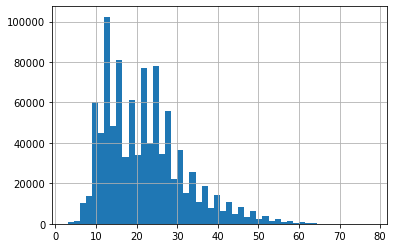

In [53]:
train_labels['width'].hist(bins=50)

<AxesSubplot:>

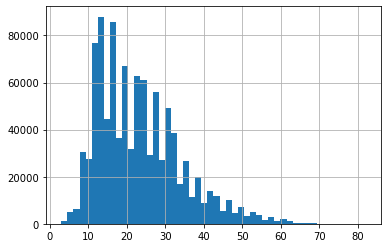

In [68]:
train_labels['height'].hist(bins=50)

In [54]:
len(train_labels)

983885

In [59]:
imp = train_labels.query("impact == 1")

In [60]:
len(imp)

2291

<AxesSubplot:>

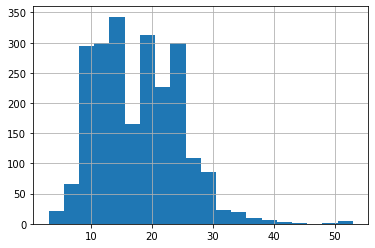

In [62]:
imp['width'].hist(bins=20)

In [66]:
len(imp.query("width <= 7"))/len(imp)

0.0379746835443038

<AxesSubplot:>

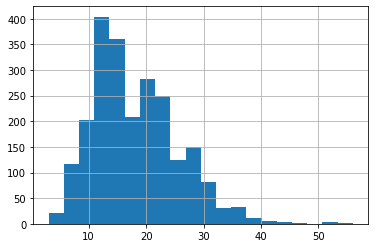

In [67]:
imp['height'].hist(bins=20)